<a href="https://colab.research.google.com/github/smaiti7/ML-Club-ASU/blob/main/KNNWorkshopTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Writing our KNN function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split

In [ ]:
# PANDAS ALSO ALLOWS US TO READ DIRECTLY FROM LINKS, AS LONG AS IT IS A DIRECT LINK TO JUST THE CSV
data = pd.read_csv("https://raw.githubusercontent.com/tal-ashkenazi01/IntroToKNearestNeighbors/main/penguins.csv")

# data = pd.read_csv("/content/penguins.csv")

In [ ]:
data = data.dropna()
data.head()

In [ ]:
sns.scatterplot(x=data["bill_length_mm"], y=data["bill_depth_mm"], hue=data["species"])
plt.show()

In [ ]:
X = data.drop(["species", "island", "sex", "body_mass_g", "flipper_length_mm"], axis=1)
Y = data["species"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=25)

In [ ]:
# DEFINE OUR EUCLIDEAN FUNCTION TO CALCULATE DISTANCE
def euclidean(point_1, point_2):
  pass

# TEST OUR EUCLIDDEAN FUNCTION

In [ ]:
# DEFINE OUR KNN FUNCTION
def KNN(X_data, Y_labels, kvalue, X_points):
  pass

In [ ]:
# TEST THAT OUR KNN FUNCTION WORKS

In [ ]:
# MAKE A PREDICTION ON A TEST POINT

In [ ]:
# WRITE A LOOP TO SEE WHICH K-VALUE IS THE MOST ACCURATE

# Using Plotly to enhance visuals

In [ ]:
import plotly.express as px

In [ ]:
# THE VISUALIZATION ITSELF

# fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Bill Length: %{x:.1f}mm<br>Bill Depth: %{y:.1f}mm<br><extra></extra>')
# fig.update_layout(height=700)
# fig.show()

Our line graph using Plotly

In [ ]:
# GRAPHING OUR ACCURACY USING PLOTLY

# accuracyGraph.update_traces(line=dict(color='firebrick', width=4, dash='dash'), marker=dict(size=15,symbol='x'))
# accuracyGraph.update_layout(xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))
# accuracyGraph.show()

#Creating a tool to make our predictions

In [ ]:
#@title Enter the details for your penguin { run: "auto" }
# CALL BACK FUNCTION TO ALLOW FOR ADDING NEW POINT
#@markdown <br>
#@markdown X-Value
Bill_Length = 43.78 #@param {type:"number"}
#@markdown <br>
#@markdown Y-Value
Bill_Depth = 15.3 #@param {type:"number"}
#@markdown <br>
#@markdown K-Value
K_Value = 9 #@param {type: "number"}

In [ ]:
#@title Run your prediction { display-mode: "form" }
# ADD THE BUTTON TO MAKE START THE PREDICTION
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.io as pio
pio.renderers.default = "colab"

# CREATE THE BUTTONS
layout = widgets.Layout(width='200px', height='70px')
button = widgets.Button(description="Make Prediction!", layout=layout)
box_layout = widgets.Layout(display='flex',
                flex_flow='column',
                align_items='center',
                width='100%')
box = widgets.HBox(children=[button],layout=box_layout)

def add_new_point(event):
  if (len(fig.data) > 1):
    reset_graph = list(fig.data)
    for i in range(len(reset_graph)):
      if len(list(reset_graph[i]['customdata'])) <= 1:
        reset_graph.pop(i)
    fig.data = reset_graph
  
  clear_output()

  # MAKE THE PREDICTION
  newPoint = pd.DataFrame({"bill_length_mm": [Bill_Length], "bill_depth_mm": [Bill_Depth]})
  prediction = KNN(X, Y, kvalue=K_Value, X_points=newPoint)
  newPoint['species'] = prediction

  # DETERMINE THE COLOR OF THE POINT TO ADD
  point_color = "DarkSlateGrey"
  for i in range(len(fig.data)):
      if fig.data[i]['customdata'][0][0] == prediction[0]:
        point_color = fig.data[i]['marker']['color']

  # MAKE THE NEW FIGURE
  temp_fig = px.scatter(newPoint,x=newPoint['bill_length_mm'], y=newPoint['bill_depth_mm'], color=newPoint['species'], custom_data=['species'])
  temp_fig.update_traces(hovertemplate='<b>%{customdata[0]}</b><br>Bill Length: %{x:.1f}mm<br>Bill Depth: %{y:.1f}mm<br><extra></extra>')
  temp_fig.update_traces(marker_symbol="x", marker_size=10, marker=dict(color=point_color, size=12, line=dict(width=2)))
  fig.add_trace(temp_fig.data[0])
  display(box)
  fig.update_layout(height=900)
  fig.show()

button.on_click(add_new_point)
display(box)

# Other uses for Plotly
Find the docs here: https://plotly.com/python/plotly-express/


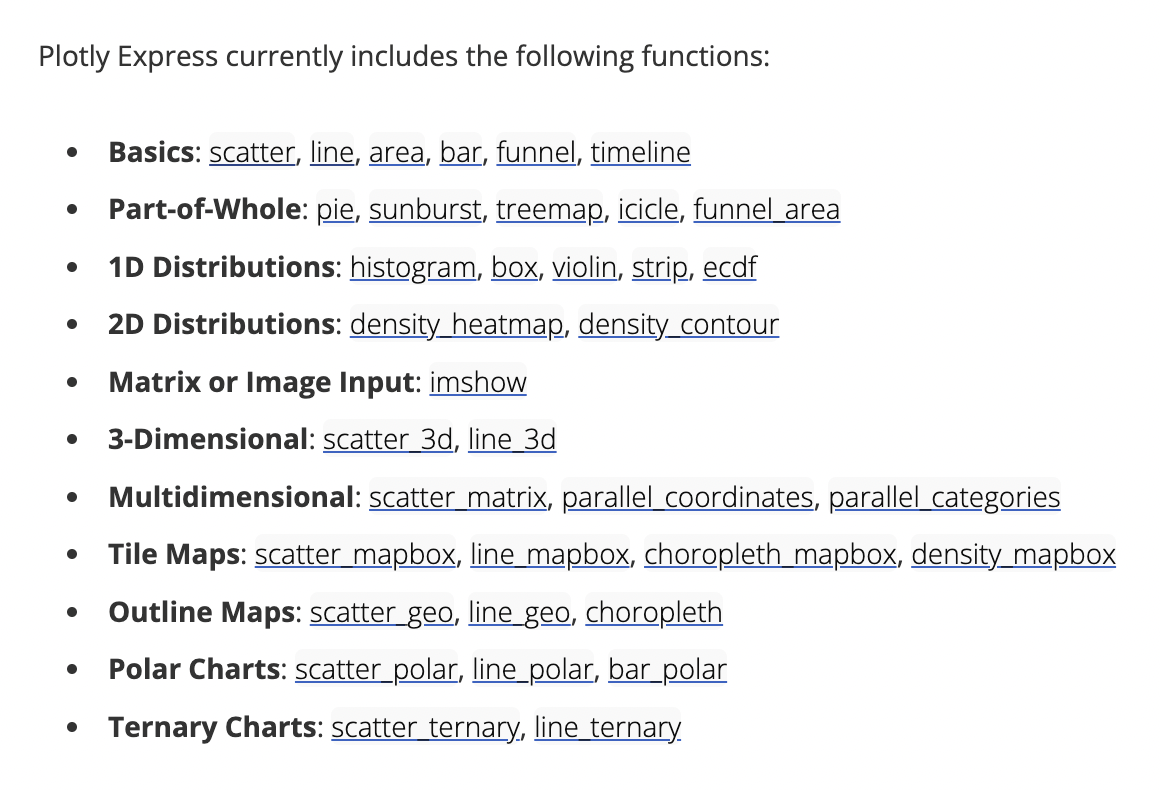

# Other libraries for visualizations:

## Pyvis
Use this with network graphs

Docs: https://pyvis.readthedocs.io/en/latest/documentation.html

In [ ]:
!pip install pyvis

In [ ]:
# THIS IMPORT IS A HACK TO ALLOW US TO SEE THE NETWORK GRAPH IN COLAB. https://github.com/WestHealth/pyvis/issues/49
from IPython.core.display import display, HTML

# EXAMPLE CODE TAKEN DIRECTLY FROM THE DOC: https://pyvis.readthedocs.io/en/latest/tutorial.html#example-visualizing-a-game-of-thrones-character-network
from pyvis.network import Network

got_net = Network(height="750px", width="100%", notebook=True, cdn_resources="remote", bgcolor="#222222", font_color="white")

# set the physics layout of the network
got_net.barnes_hut()
got_data = pd.read_csv("https://raw.githubusercontent.com/pupimvictor/NetworkOfThrones/master/stormofswords.csv")

sources = got_data['Source']
targets = got_data['Target']
weights = got_data['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
                src = e[0]
                dst = e[1]
                w = e[2]

                got_net.add_node(src, src, title=src)
                got_net.add_node(dst, dst, title=dst)
                got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

# add neighbor data to node hover data
for node in got_net.nodes:
                node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
                node["value"] = len(neighbor_map[node["id"]])

got_net.show("gameofthrones.html")

# THIS IS A HACK TO SHOW THE PYVIS GRAPH IN COLAB. IT WILL TAKE A WHILE TO LOAD
display(HTML('gameofthrones.html'))

## Folium
Used for mostly heatmaps, Folium is already installed in colab.

Note that while Folium is a powerful library, Plolty also contains geographical map-based plotting and heatmaps. Check out Plotly Mapboxes as an alternative to Folium

Docs: https://python-visualization.github.io/folium/ 

In [ ]:
# THE FOLLOWING CODE IS BASED UPON: https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94
import folium

bike_station_locations = pd.read_csv("https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/2dec86ed-76ed-47a3-ae28-646db5c5b965/download/dublin.csv")

# FILTERING THE DATA TO EXTRACT THE IMPORTANT PARTS
bike_station_locations = bike_station_locations[["Latitude", "Longitude", "Name"]]

# CREATING OUR FOLIUM MAP
map = folium.Map(location=[bike_station_locations.Latitude.mean(), bike_station_locations.Longitude.mean()], zoom_start=14, control_scale=True)

# ADD ALL OF THE LOCATIONS TO THE MAP
for index, location_info in bike_station_locations.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Name"]).add_to(map)

# SHOW THE MAP
map.add_child(folium.LatLngPopup())
map

##Bokeh
Bokeh is usually used as a server based dashboard of visualizations, it is already installed in google colab

Docs: https://docs.bokeh.org/en/latest/ 

In [ ]:
# THE FOLLOWING IS A MODIFIED VERSION OF A BOKEH TUTORIAL ADAPTED TO WORK BETTER IN COLAB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html 
# A HACK TO SHOW THE GRAPH IN THE NOTEBOOK
from ipywidgets import interact

# IMPORTING BOKEH
import bokeh.io
from bokeh.plotting import figure
bokeh.io.output_notebook()

In [ ]:
# CREATING OUR DATA
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [ ]:
# FUNCTION THAT UPDATES THE GRAPH WHEN CHANGES ARE MADE
def update(f, w=1, A=1, phi=0):
  if f == "sin" : func = np.sin
  if f == "cos" : func = np.cos
  if f == "tan" : func = np.tan
  r.data_source.data['y'] = A * func(w * x + phi)
  bokeh.io.push_notebook()

p = figure(title="Adjusting a sine graph", plot_height=600, plot_width=900, y_range=(-5, 5))
r = p.line(x, y, color="#2222aa", line_width=3)

bokeh.io.show(p, notebook_handle=True)

# A CALLBACK FUNCTION CONTROLLED BY IPYTHON THAT CONTROLS THE BOKEH GRAPH
interact(update, f=['sin', 'cos', 'tan'], w=(0, 100), A=(1, 5), phi = (0, 20, 0.1))

##The google colab plotting cheat sheet
https://colab.research.google.com/notebooks/charts.ipynb